# HW3-2 

- 資料 : Online Shoppers Purchasing IntentionDataset Data Set

In [324]:
import pandas as  pd
import numpy as np

In [325]:
data = pd.read_csv("online_shoppers_intention.csv")
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [326]:
# 拆分成 Revenue = True 的資料
buy_data = data[data["Revenue"] == True]
no_data = data[data["Revenue"] == False]
buy_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
65,3,87.833333,0,0.0,27,798.333333,0.000000,0.012644,22.916036,0.8,Feb,2,2,3,1,Returning_Visitor,False,True
76,10,1005.666667,0,0.0,36,2111.341667,0.004348,0.014493,11.439412,0.0,Feb,2,6,1,2,Returning_Visitor,False,True
101,4,61.000000,0,0.0,19,607.000000,0.000000,0.026984,17.535959,1.0,Feb,1,1,7,4,Returning_Visitor,True,True
188,9,111.500000,1,48.5,49,1868.819697,0.000000,0.020709,1.706015,0.0,Mar,2,2,7,2,Returning_Visitor,False,True
196,2,56.000000,1,144.0,67,2563.783333,0.000000,0.005797,19.342650,0.0,Mar,2,2,4,2,New_Visitor,False,True


In [327]:
# 是否有 NULL 值
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [328]:
# 基本欄位資訊
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [329]:
def compare_df(df1, df2):
    describe1 = df1.describe()
    describe2 = df2.describe()
    columns = list(describe1.columns)
    indexs = list(describe1.index)

    # 有買的顧客和沒有購物的顧客，各項平均數值差異
    print("%-25s | %10s | %10s | %8s | %11s" % ("Column", "Buy", "Non-Buy", "Difference", "Percentage"))
    for i in range(len(columns)):
        s1 = describe1[columns[i]][1]
        s2 = describe2[columns[i]][1]
        diff = s1 - s2
        print("%-25s | %10.4f | %10.4f | %10.4f | %10.2f" % (columns[i], s1, s2, diff, diff/s2*100), end="")
        print("%")

In [330]:
buy_info = buy_data.describe()
no_info = no_data.describe()
columns = list(buy_info.columns)
indexs = list(buy_info.index)

# 有買的顧客和所有顧客的平均數值差異
compare_df(buy_data, no_data)

Column                    |        Buy |    Non-Buy | Difference |  Percentage
Administrative            |     3.3936 |     2.1177 |     1.2759 |      60.25%
Administrative_Duration   |   119.4832 |    73.7401 |    45.7431 |      62.03%
Informational             |     0.7862 |     0.4518 |     0.3343 |      73.99%
Informational_Duration    |    57.6114 |    30.2362 |    27.3752 |      90.54%
ProductRelated            |    48.2102 |    28.7146 |    19.4955 |      67.89%
ProductRelated_Duration   |  1876.2096 |  1069.9878 |   806.2218 |      75.35%
BounceRates               |     0.0051 |     0.0253 |    -0.0202 |     -79.79%
ExitRates                 |     0.0196 |     0.0474 |    -0.0278 |     -58.73%
PageValues                |    27.2645 |     1.9760 |    25.2885 |    1279.78%
SpecialDay                |     0.0232 |     0.0684 |    -0.0453 |     -66.15%
OperatingSystems          |     2.0928 |     2.1297 |    -0.0370 |      -1.74%
Browser                   |     2.4534 |     2.3395 

In [331]:
# total data correlation
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


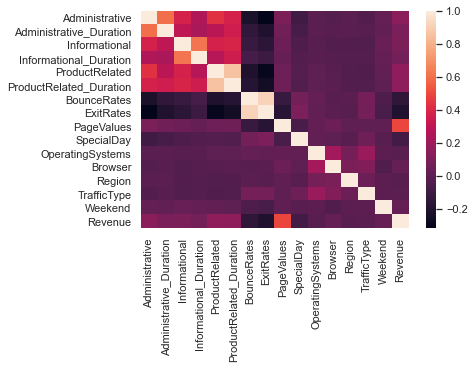

In [332]:
import numpy as np
import seaborn as sns

ax = sns.heatmap(corr)

In [333]:
# 最後有購買跟最後沒購買的人數
data["Revenue"].value_counts().sort_index()

False    10422
True      1908
Name: Revenue, dtype: int64

In [334]:
# 交通方式各類別數
data["TrafficType"].value_counts().sort_index()

1     2451
2     3913
3     2052
4     1069
5      260
6      444
7       40
8      343
9       42
10     450
11     247
12       1
13     738
14      13
15      38
16       3
17       1
18      10
19      17
20     198
Name: TrafficType, dtype: int64

## Operating System Preprocessing

轉換成類別資料。

In [335]:
df_buy_system = pd.get_dummies(buy_data["OperatingSystems"], prefix='operating_system')
df_no_system = pd.get_dummies(no_data["OperatingSystems"], prefix='operating_system')

print("%45s" % "< Operating System >")
compare_df(df_buy_system, df_no_system)

                         < Operating System >
Column                    |        Buy |    Non-Buy | Difference |  Percentage
operating_system_1        |     0.1986 |     0.2117 |    -0.0130 |      -6.16%
operating_system_2        |     0.6053 |     0.5225 |     0.0828 |      15.84%
operating_system_3        |     0.1405 |     0.2194 |    -0.0790 |     -35.99%
operating_system_4        |     0.0445 |     0.0377 |     0.0068 |      18.14%
operating_system_5        |     0.0005 |     0.0005 |     0.0000 |       9.25%
operating_system_6        |     0.0010 |     0.0016 |    -0.0006 |     -35.74%
operating_system_7        |     0.0005 |     0.0006 |    -0.0001 |      -8.96%
operating_system_8        |     0.0089 |     0.0059 |     0.0030 |      49.77%


## Browser Preprocessing

轉換成類別資料。

In [336]:
df_buy_browser = pd.get_dummies(buy_data["Browser"], prefix='browser')
df_no_browser = pd.get_dummies(no_data["Browser"], prefix='browser')

print("%45s" % "< Browser >")
compare_df(df_buy_browser, df_no_browser)

                                  < Browser >
Column                    |        Buy |    Non-Buy | Difference |  Percentage
browser_1                 |     0.1913 |     0.2012 |    -0.0099 |      -4.92%
browser_2                 |     0.6410 |     0.6465 |    -0.0055 |      -0.86%
browser_3                 |     0.0026 |     0.0096 |    -0.0070 |     -72.69%
browser_4                 |     0.0681 |     0.0581 |     0.0100 |      17.18%
browser_5                 |     0.0451 |     0.0366 |     0.0085 |      23.30%
browser_6                 |     0.0105 |     0.0148 |    -0.0043 |     -29.06%
browser_7                 |     0.0031 |     0.0041 |    -0.0010 |     -23.78%
browser_8                 |     0.0110 |     0.0109 |     0.0001 |       0.62%
browser_10                |     0.0168 |     0.0126 |     0.0042 |      33.43%
browser_11                |     0.0005 |     0.0005 |     0.0000 |       9.25%
browser_12                |     0.0016 |     0.0007 |     0.0009 |     134.10%
browse

## Traffic Type Preprocessing

轉換成類別資料。

In [337]:
from sklearn.preprocessing import OneHotEncoder  # convert value to category

In [338]:
# rename column
def rename_list(name, column):
    name_dict = {}
    for i in range(len(column)):
        name_dict[column[i]] = name + "_" + str(column[i])
    return name_dict

df_traffic = pd.get_dummies(data["TrafficType"], prefix="traffic")
df_traffic.head()

,traffic_1,traffic_2,traffic_3,traffic_4,traffic_5,traffic_6,traffic_7,traffic_8,traffic_9,traffic_10,traffic_11,traffic_12,traffic_13,traffic_14,traffic_15,traffic_16,traffic_17,traffic_18,traffic_19,traffic_20
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [339]:
df_buy_traffic = pd.get_dummies(buy_data["TrafficType"], prefix="traffic")
df_buy_region = pd.get_dummies(buy_data["Region"], prefix="region")

df_no_traffic = pd.get_dummies(no_data["TrafficType"], prefix="traffic")
df_no_region = pd.get_dummies(no_data["Region"], prefix="region")

In [340]:
df_traffic["Revenue"] = data["Revenue"]
corr = df_traffic.corr()
df_traffic = df_traffic.drop(["Revenue"], axis=1)

# traffic_2 和 Revenue 擁有較高的 correlation
corr["Revenue"].sort_values(ascending=False)

Revenue       1.000000
traffic_2     0.116347
traffic_8     0.057167
traffic_20    0.034540
traffic_5     0.024609
traffic_10    0.024354
traffic_7     0.022913
traffic_11    0.014050
traffic_16    0.007703
traffic_14   -0.000081
traffic_4    -0.000336
traffic_17   -0.003853
traffic_12   -0.003853
traffic_9    -0.009619
traffic_19   -0.009855
traffic_18   -0.012190
traffic_6    -0.018905
traffic_15   -0.023790
traffic_1    -0.065901
traffic_13   -0.067310
traffic_3    -0.082808
Name: Revenue, dtype: float64

In [341]:
print("%50s" % "< Traffic Type >")
compare_df(df_buy_traffic, df_no_traffic)

                                  < Traffic Type >
Column                    |        Buy |    Non-Buy | Difference |  Percentage
traffic_1                 |     0.1373 |     0.2100 |    -0.0727 |     -34.62%
traffic_2                 |     0.4439 |     0.2942 |     0.1497 |      50.90%
traffic_3                 |     0.0943 |     0.1796 |    -0.0853 |     -47.48%
traffic_4                 |     0.0865 |     0.0867 |    -0.0003 |      -0.30%
traffic_5                 |     0.0294 |     0.0196 |     0.0098 |      49.94%
traffic_6                 |     0.0278 |     0.0375 |    -0.0097 |     -25.96%
traffic_7                 |     0.0063 |     0.0027 |     0.0036 |     134.10%
traffic_8                 |     0.0498 |     0.0238 |     0.0260 |     109.24%
traffic_9                 |     0.0021 |     0.0036 |    -0.0015 |     -42.50%
traffic_10                |     0.0472 |     0.0345 |     0.0126 |      36.56%
traffic_11                |     0.0246 |     0.0192 |     0.0054 |      28.36%
t

## Region Preprocessing

轉換成類別資料，並比較有購物與無購物使用者的行為、特性。

In [342]:
df_region = pd.get_dummies(data["Region"], prefix="region")
df_region.head()

,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0


In [343]:
df_region["Revenue"] = data["Revenue"]
corr = df_region.corr()
df_region = df_region.drop(["Revenue"], axis=1)

'''
region 和 Revenue 比較沒有關係
'''
corr["Revenue"].sort_values(ascending=False)

Revenue     1.000000
region_1    0.014416
region_2    0.009468
region_9    0.007792
region_5    0.003949
region_7    0.001155
region_4   -0.006024
region_6   -0.011410
region_3   -0.012937
region_8   -0.013579
Name: Revenue, dtype: float64

In [344]:
print("%45s" % "< Region >")
compare_df(df_buy_region, df_no_region)

                                   < Region >
Column                    |        Buy |    Non-Buy | Difference |  Percentage
region_1                  |     0.4041 |     0.3847 |     0.0194 |       5.05%
region_2                  |     0.0985 |     0.0910 |     0.0076 |       8.32%
region_3                  |     0.1829 |     0.1971 |    -0.0142 |      -7.19%
region_4                  |     0.0917 |     0.0966 |    -0.0049 |      -5.07%
region_5                  |     0.0273 |     0.0255 |     0.0017 |       6.78%
region_6                  |     0.0587 |     0.0665 |    -0.0078 |     -11.72%
region_7                  |     0.0624 |     0.0616 |     0.0008 |       1.25%
region_8                  |     0.0294 |     0.0363 |    -0.0069 |     -19.08%
region_9                  |     0.0451 |     0.0408 |     0.0043 |      10.53%


## Month Preprocessing

轉換成類別資料。

In [345]:
buy_data["Month"].value_counts()

Nov     760
May     365
Dec     216
Mar     192
Oct     115
Sep      86
Aug      76
Jul      66
June     29
Feb       3
Name: Month, dtype: int64

In [346]:
import datetime
import warnings

# ignore warning
warnings.filterwarnings("ignore")

# 將月份的簡寫轉成數字
def month_to_int(month):
    if(month == "June"):
        month = "Jun"
    obj = datetime.datetime.strptime(month, "%b")
    num = obj.month
    return num

buy_data["month"] = buy_data["Month"].apply(lambda x: month_to_int(x))
no_data["month"] = no_data["Month"].apply(lambda x: month_to_int(x))

df_buy_month = pd.get_dummies(buy_data["month"], prefix='month')
df_no_month = pd.get_dummies(no_data["month"], prefix='month')

print("%45s" % "< Month >")
compare_df(df_buy_month, df_no_month)

                                    < Month >
Column                    |        Buy |    Non-Buy | Difference |  Percentage
month_2                   |     0.0016 |     0.0174 |    -0.0158 |     -90.95%
month_3                   |     0.1006 |     0.1646 |    -0.0639 |     -38.85%
month_5                   |     0.1913 |     0.2878 |    -0.0965 |     -33.52%
month_6                   |     0.0152 |     0.0249 |    -0.0097 |     -38.84%
month_7                   |     0.0346 |     0.0351 |    -0.0005 |      -1.50%
month_8                   |     0.0398 |     0.0343 |     0.0056 |      16.28%
month_9                   |     0.0451 |     0.0347 |     0.0103 |      29.77%
month_10                  |     0.0603 |     0.0416 |     0.0186 |      44.74%
month_11                  |     0.3983 |     0.2147 |     0.1836 |      85.49%
month_12                  |     0.1132 |     0.1450 |    -0.0318 |     -21.92%


In [347]:
tmp = data.copy()
tmp["Month"] =  tmp["Month"].apply(lambda x: month_to_int(x))
df_month = pd.get_dummies(tmp["Month"], prefix="month")
df_month.head()

,month_2,month_3,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


## 小結

利用 Heatmap 查看與 Revenue 的結果關係。

In [348]:
test = pd.DataFrame()
test["Revenue"] = data["Revenue"]
test["traffic_2"] = df_traffic["traffic_2"]
test["region_1"] = df_region["region_1"]
test["region_3"] = df_region["region_3"]

'''
只有 traffic_1 擁有較高的參考價值
'''
corr = test.corr()
corr.style.background_gradient(cmap='coolwarm')

,Revenue,traffic_2,region_1,region_3
Revenue,1.000000,0.116347,0.014416,-0.012937
traffic_2,0.116347,1.000000,0.009312,0.006771
region_1,0.014416,0.009312,1.000000,-0.391479
region_3,-0.012937,0.006771,-0.391479,1.000000


## Model

使用 DecisionTree 和 RandomForest 兩種方法，並用 KFold 方法驗證。

In [349]:
list(data.columns)

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Revenue']

In [350]:
train_list = list(data.columns)
remove_list = ['Month', "OperatingSystems", "Browser", "Weekend", "SpecialDay",  \
               "VisitorType", "Revenue"]
for i in range(len(remove_list)):
    train_list.remove(remove_list[i])
train_list

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'Region',
 'TrafficType']

In [351]:
from sklearn.model_selection import KFold          # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 

train_x = data[train_list]
train_y = data["Revenue"]

def model_fit(train_x, train_y, model):
    kf = KFold(n_splits=3, random_state=1012, shuffle=True)  
    kf.get_n_splits(train_x) 
    
    train_acc_list = []                                   # 儲存每次訓練模型的準確度
    valid_acc_list = [] 

    for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
        train_x_split = train_x.iloc[train_index]         # 產生訓練資料
        train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
        valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
        valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤

        model.fit(train_x_split, train_y_split)

        train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
        train_acc = accuracy_score(train_y_split,         # 計算訓練資料準確度
                                   train_pred_y)
        valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
        valid_acc = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                                   valid_pred_y)

        train_acc_list.append(train_acc)
        valid_acc_list.append(valid_acc)

    print((
        'average train accuracy: {}\n' +
        'min train accuracy: {}\n' +
        'max train accuracy: {}').format(
        round(np.mean(train_acc_list), 4),                 # 輸出平均訓練準確度
        round(np.min(train_acc_list), 4),                  # 輸出最低訓練準確度
        round(np.max(train_acc_list), 4)                   # 輸出最高訓練準確度
    ))
    print()
    print((
        'average valid accuracy: {}\n' +
        'min valid accuracy: {}\n' +
        'max valid accuracy: {}').format(
        round(np.mean(valid_acc_list), 4),                  # 輸出平均驗證準確度
        round(np.min(valid_acc_list), 4),                   # 輸出最低驗證準確度
        round(np.max(valid_acc_list), 4)                    # 輸出最高驗證準確度
    ))
    
model = DecisionTreeClassifier(random_state=40)
model_fit(train_x, train_y, model)

average train accuracy: 0.9999
min train accuracy: 0.9999
max train accuracy: 1.0

average valid accuracy: 0.8528
min valid accuracy: 0.8516
max valid accuracy: 0.8545


In [352]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=10, random_state=0)
model_fit(train_x, train_y, model)

average train accuracy: 0.9489
min train accuracy: 0.9473
max train accuracy: 0.9515

average valid accuracy: 0.8938
min valid accuracy: 0.8932
max valid accuracy: 0.8944


## 合併找出來的特徵

In [353]:
# 加上經過處理的欄位
test = train_x.copy()
test = pd.concat([train_x, df_traffic], axis=1)
test = pd.concat([test, df_month], axis=1)

test = test.drop(["TrafficType", "Region"], axis=1)

model = DecisionTreeClassifier(random_state=40)
model_fit(test, train_y, model)

average train accuracy: 1.0
min train accuracy: 1.0
max train accuracy: 1.0

average valid accuracy: 0.8623
min valid accuracy: 0.8586
max valid accuracy: 0.8664


In [354]:
model = RandomForestClassifier(max_depth=10, random_state=0)
model_fit(test, train_y, model)

average train accuracy: 0.9386
min train accuracy: 0.9361
max train accuracy: 0.9411

average valid accuracy: 0.8936
min valid accuracy: 0.8895
max valid accuracy: 0.8959
